In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "retail_sales_dataset.csv"

# Load the latest version
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mohammadtalib786/retail-sales-dataset",
    file_path,
)

print(data.head())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27036\3842464384.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [2]:
# 📊 Day 8: Project - Retail Analytics (SQL + Pandas)
# Author: David Caleb Chaparro Orozco
# Topic: End-to-End Retail Data Analysis using SQL Queries and Pandas

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlite3
import os
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Set visualization style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 8)

## 1. Data Loading & Initial Exploration

In [3]:
# Load the data
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Check a overview of the dataset
def overview(data):
    print("=".center(50,"="))
    # Print the shape of the dataset to see how many rows and columns it has.
    print(f"\nRetail Sales Dataset Overview")
    print(f"Shape: {data.shape}")
    print("=".center(50,"="))

    # Display Index, Columns, and Data Types
    print("Information about the features:")
    print(data.info())
    print("=".center(50,"="))

    # Display summary statistics
    print("Basic statistics check:")
    print(data.describe())
    print("=".center(50,"="))

    # I always run this part to understand the unique values in each column.
    # It helps me get a sense of the data, especially which features are categorical or have low variability.
    print("Checking the number of unique values:")
    unique_counts = {}
    for column in data.columns:
        unique_counts[column] = data[column].nunique()
    unique_data = pd.DataFrame(unique_counts, index=["Unique Count"]).transpose()
    print(unique_data)
    print("=".center(50, "="))

    # Check for Missing Values
    print("Check for missing values:")
    print(data.isnull().sum())
overview(data)


Retail Sales Dataset Overview
Shape: (1000, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
Basic statistics check:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.00000

## 2. Data Cleaning & Preparation

In [5]:
def data_cleaning(data):

    # Make a copy of the original data to preserve it
    data_cleaned = data.copy()

    print("=".center(50, "="))
    print("Data Cleaning Overview")
    # Drop missing values
    print("Original data:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Drop missing values
    print("Dropping missing values")
    data_cleaned = data_cleaned.dropna()
    print("After dropping missing values:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Fill remaining missing values with a constant
    print("Filling any remaining missing values with 'Unknown'")
    data_cleaned = data_cleaned.fillna("Unknown")
    print("After filling missing values:")
    print(data_cleaned.head())
    print("=".center(50, "="))


    # Rename columns for clarity
    print("Renaming columns for clarity")
    data_cleaned = data_cleaned.rename(columns={"Transaction ID": "TransactionID",
                                                "Customer ID": "CustomerID",
                                                "Product Category": "ProductCategory",
                                                "Price per Unit": "PricexUnit",
                                                "Total Amount": "TotalAmount"
                                                })
    print("After renaming columns:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Convert date to datetime
    print("\nConverting date column...")
    data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
    
    # Create month and year columns
    data_cleaned['Month'] = data_cleaned['Date'].dt.month
    data_cleaned['Year'] = data_cleaned['Date'].dt.year
    
    print("\nFinal cleaned data preview:")
    display(data_cleaned.head())

    return data_cleaned

cleaned_data = data_cleaning(data)

Data Cleaning Overview
Original data:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Dropping missing values
After dropping missing values:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002 

,TransactionID,Date,CustomerID,Gender,Age,ProductCategory,Quantity,PricexUnit,TotalAmount,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023


## 3. Exploratory Data Analysis (EDA) - Dashboard Style

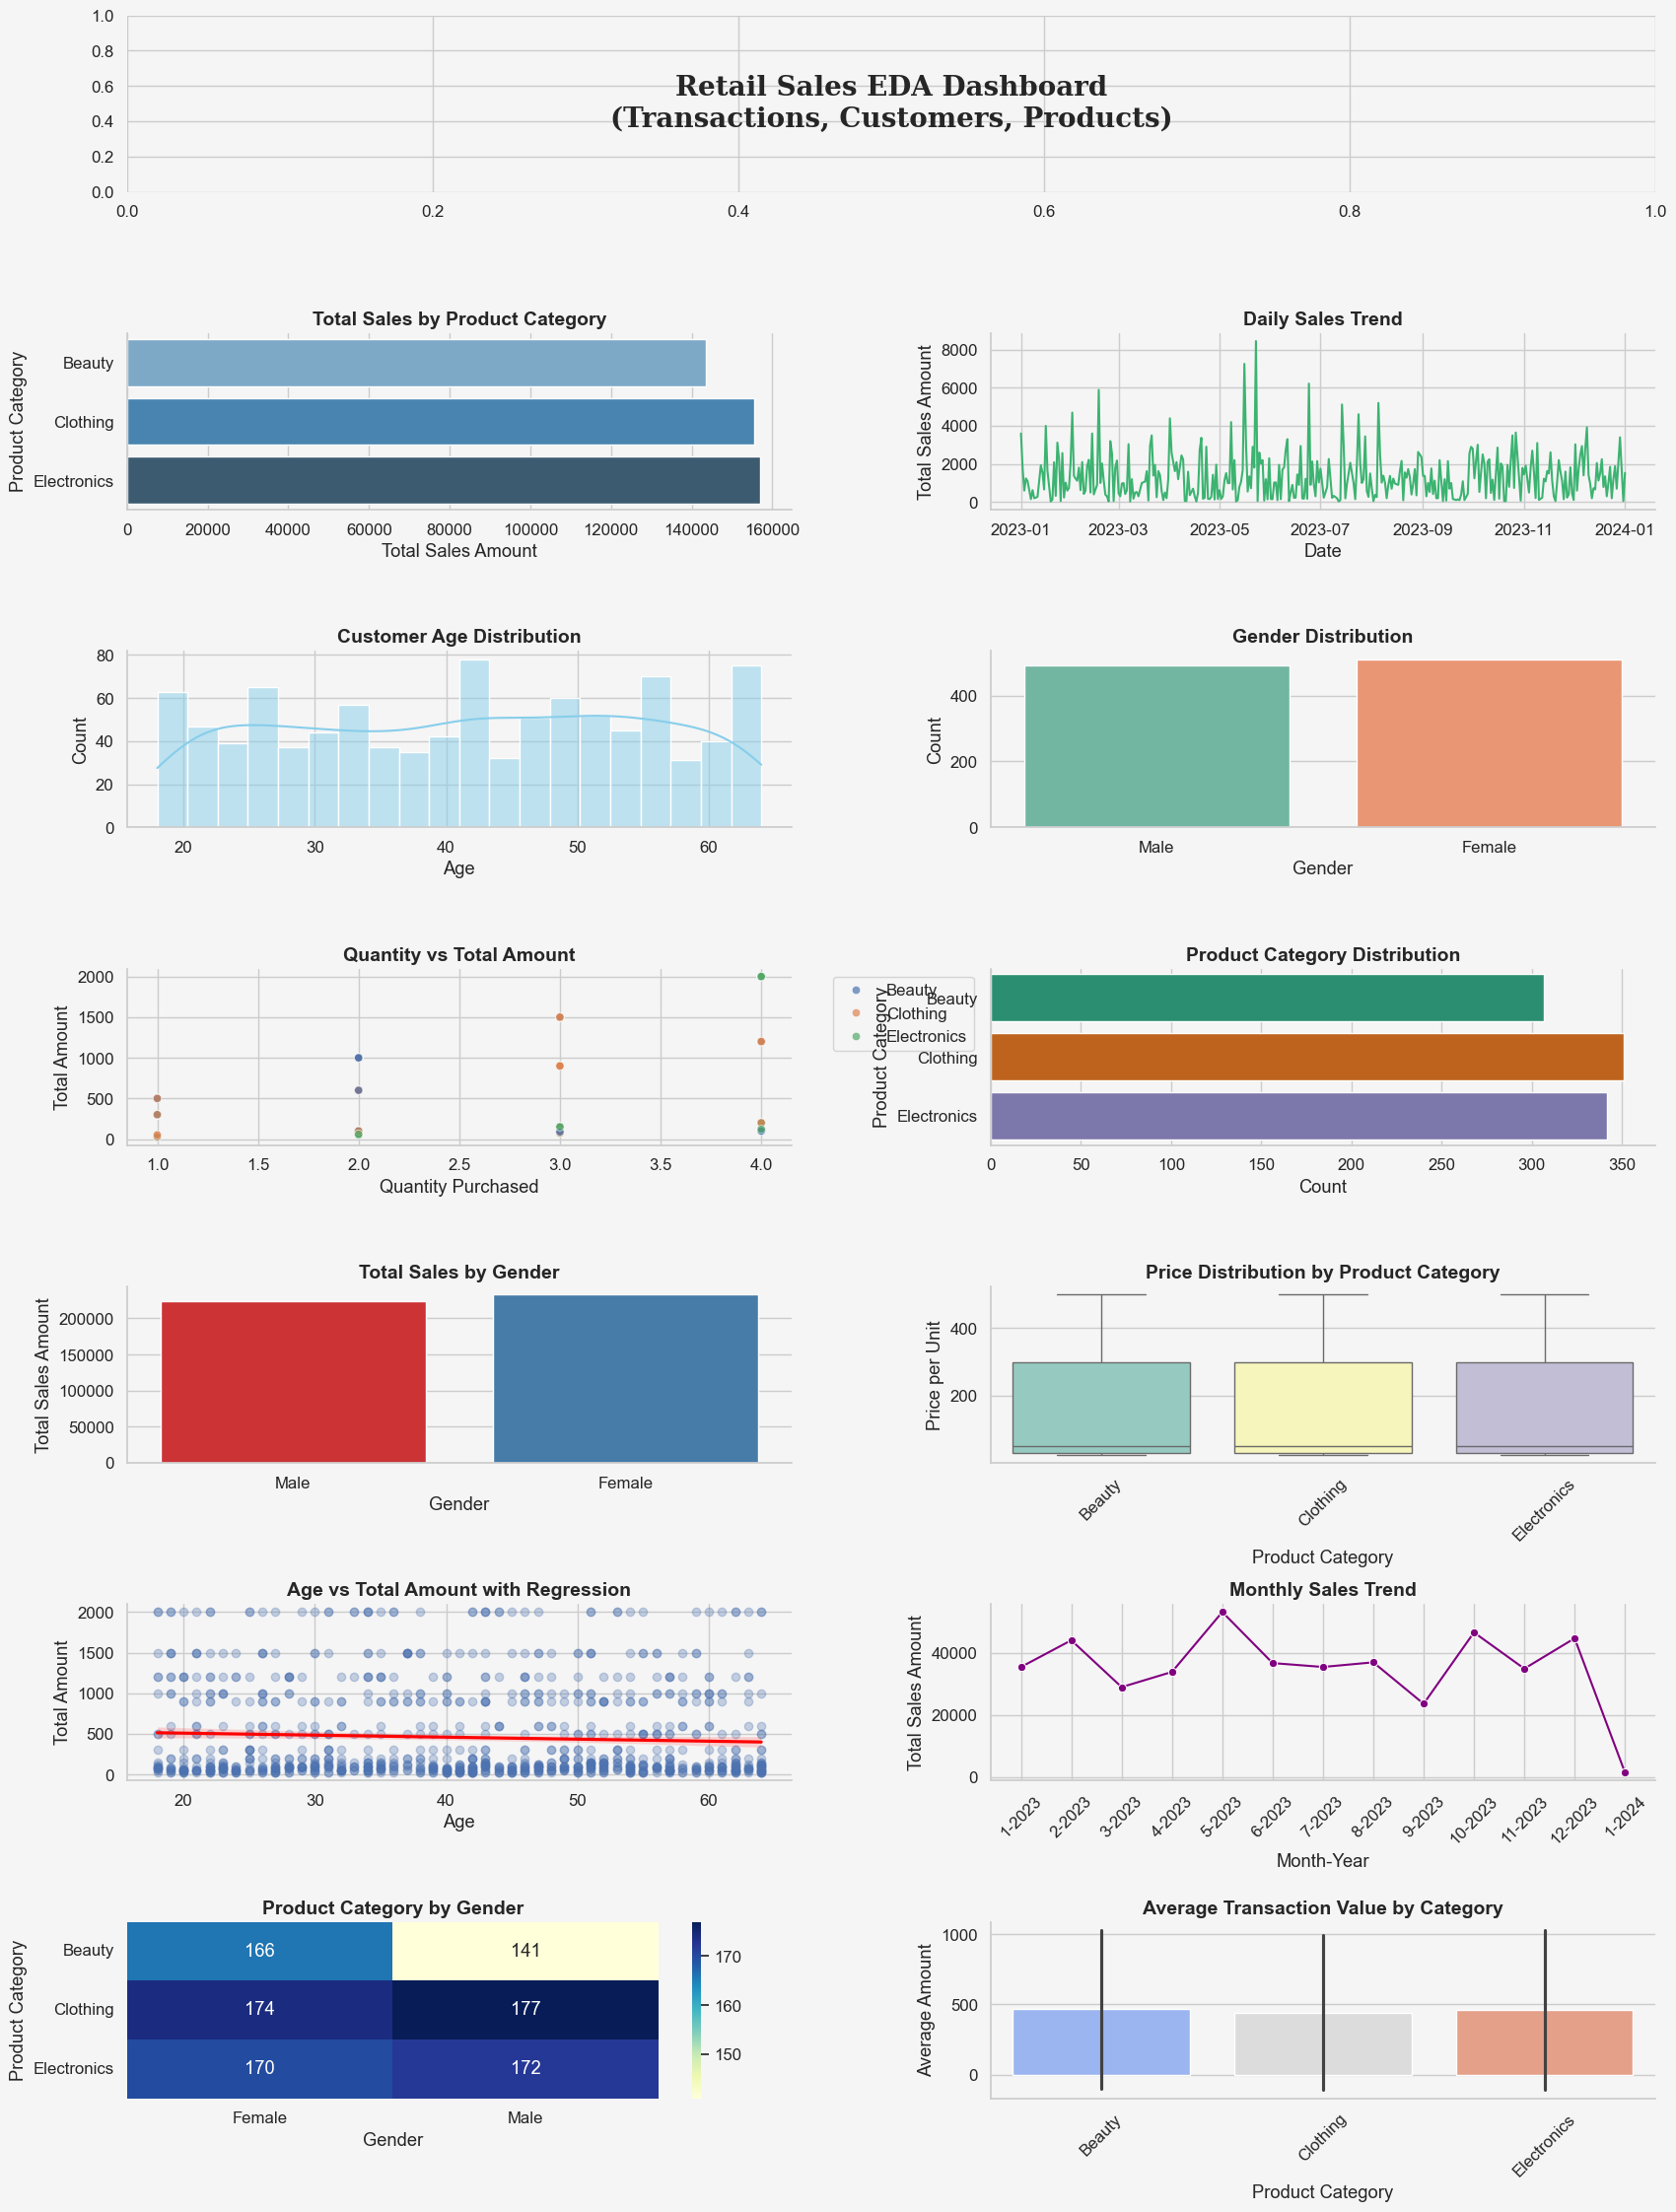

In [6]:
# Create outputs directory if it doesn't exist

os.makedirs("outputs", exist_ok=True)

# Global style and figure aesthetics
background_color = "#f5f5f5"
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['figure.facecolor'] = background_color
plt.rcParams['axes.facecolor'] = background_color

# Layout for dashboard
fig = plt.figure(figsize=(20, 40))
gs = fig.add_gridspec(10, 2)
gs.update(wspace=0.3, hspace=0.8)

# Title
title_ax = fig.add_subplot(gs[0, :])
title_ax.set_facecolor(background_color)
for spine in title_ax.spines.values():
    spine.set_visible(False)
title_ax.tick_params(left=False, bottom=False)
title_ax.text(0.5, 0.5,
                'Retail Sales EDA Dashboard\n(Transactions, Customers, Products)',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, fontweight='bold', fontfamily='serif')

# Axes assignment for different visualizations
axes = [
    # 1. Sales distribution by product category
    fig.add_subplot(gs[1, 0]),  
    # 2. Total sales over time
    fig.add_subplot(gs[1, 1]),  
    # 3. Customer age distribution
    fig.add_subplot(gs[2, 0]),  
    # 4. Gender distribution
    fig.add_subplot(gs[2, 1]),  
    # 5. Quantity vs Total Amount
    fig.add_subplot(gs[3, 0]),  
    # 6. Product category counts
    fig.add_subplot(gs[3, 1]),  
    # 7. Sales by gender
    fig.add_subplot(gs[4, 0]),  
    # 8. Price per unit distribution (using PricexUnit)
    fig.add_subplot(gs[4, 1]),  
    # 9. Age vs Total Amount
    fig.add_subplot(gs[5, 0]),  
    # 10. Monthly sales trend
    fig.add_subplot(gs[5, 1]),  
    # 11. Product category by gender
    fig.add_subplot(gs[6, 0]),  
    # 12. Average transaction by category
    fig.add_subplot(gs[6, 1]),  
]

# 1. Sales distribution by product category
sns.barplot(data=cleaned_data, x='TotalAmount', y='ProductCategory', 
            estimator=sum, ci=None, palette='Blues_d', ax=axes[0])
axes[0].set_title('Total Sales by Product Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Sales Amount')
axes[0].set_ylabel('Product Category')
sns.despine(ax=axes[0])

# 2. Total sales over time (line plot)
sales_over_time = cleaned_data.groupby('Date')['TotalAmount'].sum().reset_index()
sns.lineplot(data=sales_over_time, x='Date', y='TotalAmount', 
            color='mediumseagreen', ax=axes[1])
axes[1].set_title('Daily Sales Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Sales Amount')
sns.despine(ax=axes[1])

# 3. Customer age distribution
sns.histplot(cleaned_data['Age'], bins=20, kde=True, 
            color='skyblue', ax=axes[2])
axes[2].set_title('Customer Age Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
sns.despine(ax=axes[2])

# 4. Gender distribution
sns.countplot(data=cleaned_data, x='Gender', palette='Set2', ax=axes[3])
axes[3].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Gender')
axes[3].set_ylabel('Count')
sns.despine(ax=axes[3])

# 5. Quantity vs Total Amount scatter plot
sns.scatterplot(data=cleaned_data, x='Quantity', y='TotalAmount', 
                hue='ProductCategory', alpha=0.7, ax=axes[4])
axes[4].set_title('Quantity vs Total Amount', fontsize=14, fontweight='bold')
axes[4].set_xlabel('Quantity Purchased')
axes[4].set_ylabel('Total Amount')
axes[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(ax=axes[4])

# 6. Product category counts
sns.countplot(data=cleaned_data, y='ProductCategory', 
            palette='Dark2', ax=axes[5])
axes[5].set_title('Product Category Distribution', fontsize=14, fontweight='bold')
axes[5].set_xlabel('Count')
axes[5].set_ylabel('Product Category')
sns.despine(ax=axes[5])

# 7. Sales by gender
sns.barplot(data=cleaned_data, x='Gender', y='TotalAmount', 
            estimator=sum, ci=None, palette='Set1', ax=axes[6])
axes[6].set_title('Total Sales by Gender', fontsize=14, fontweight='bold')
axes[6].set_xlabel('Gender')
axes[6].set_ylabel('Total Sales Amount')
sns.despine(ax=axes[6])

# 8. Price per unit distribution (using PricexUnit)
sns.boxplot(data=cleaned_data, x='ProductCategory', y='PricexUnit', 
            palette='Set3', ax=axes[7])
axes[7].set_title('Price Distribution by Product Category', fontsize=14, fontweight='bold')
axes[7].set_xlabel('Product Category')
axes[7].set_ylabel('Price per Unit')
axes[7].tick_params(axis='x', rotation=45)
sns.despine(ax=axes[7])

# 9. Age vs Total Amount
sns.regplot(data=cleaned_data, x='Age', y='TotalAmount', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[8])
axes[8].set_title('Age vs Total Amount with Regression', fontsize=14, fontweight='bold')
axes[8].set_xlabel('Age')
axes[8].set_ylabel('Total Amount')
sns.despine(ax=axes[8])

# 10. Monthly sales trend
monthly_sales = cleaned_data.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales['Period'] = monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str)
sns.lineplot(data=monthly_sales, x='Period', y='TotalAmount', 
            marker='o', color='purple', ax=axes[9])
axes[9].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
axes[9].set_xlabel('Month-Year')
axes[9].set_ylabel('Total Sales Amount')
axes[9].tick_params(axis='x', rotation=45)
sns.despine(ax=axes[9])

# 11. Product category by gender (heatmap)
pivot = pd.crosstab(cleaned_data['ProductCategory'], cleaned_data['Gender'])
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', ax=axes[10])
axes[10].set_title('Product Category by Gender', fontsize=14, fontweight='bold')
axes[10].set_xlabel('Gender')
axes[10].set_ylabel('Product Category')

# 12. Average transaction by category
sns.barplot(data=cleaned_data, x='ProductCategory', y='TotalAmount', 
            estimator=np.mean, ci='sd', palette='coolwarm', ax=axes[11])
axes[11].set_title('Average Transaction Value by Category', fontsize=14, fontweight='bold')
axes[11].set_xlabel('Product Category')
axes[11].set_ylabel('Average Amount')
axes[11].tick_params(axis='x', rotation=45)
sns.despine(ax=axes[11])

# Save the dashboard
plt.tight_layout()
plt.savefig('outputs/retail_sales_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ### Additional Interactive Visualizations

# %%
# Interactive monthly sales trend
fig = px.line(monthly_sales, x='Period', y='TotalAmount', 
                title='<b>Interactive Monthly Sales Trend</b>',
                labels={'TotalAmount': 'Total Sales Amount', 'Period': 'Month-Year'},
                template='plotly_white')
fig.update_layout(title_x=0.5)
fig.write_html('outputs/monthly_sales_trend.html')
fig.show()

# Interactive sunburst chart of sales
fig = px.sunburst(cleaned_data, path=['Gender', 'ProductCategory'], values='TotalAmount',
                    title='<b>Sales Distribution by Gender and Product Category</b>',
                    template='plotly_white')
fig.update_layout(title_x=0.5)
fig.write_html('outputs/sales_sunburst.html')
fig.show()

# Interactive scatter matrix
fig = px.scatter_matrix(cleaned_data,
                        dimensions=['Age', 'Quantity', 'PricexUnit', 'TotalAmount'],
                        color='Gender',
                        title='<b>Scatter Matrix of Key Variables</b>',
                        template='plotly_white')
fig.update_layout(title_x=0.5)
fig.write_html('outputs/scatter_matrix.html')
fig.show()

## 4. SQL Analysis with Pandas

In [7]:
conn = sqlite3.connect(':memory:')

In [8]:
# Create a persistent SQLite database file in the data directory
db_path = os.path.join("data", "retail_sales.db")
conn = sqlite3.connect(db_path)

In [9]:
# Load our cleaned data into SQL
cleaned_data.to_sql('retail_sales', conn, index=False, if_exists='replace')

# Helper function to execute queries and display results
def run_query(query):
    return pd.read_sql_query(query, conn)

# For statements that don't return results (CREATE, INSERT, etc.)
def execute_sql(sql):
    cursor = conn.cursor()
    cursor.execute(sql)
    conn.commit()
    return f"Executed successfully: {sql.split()[0]} operation"

In [10]:
# Verify the database was created
print(f"SQL database created at: {os.path.abspath(db_path)}")
print("Tables in database:", run_query("SELECT name FROM sqlite_master WHERE type='table';"))

SQL database created at: c:\Users\Usuario\Desktop\100DaysofDataMastery\Day08_Project_RetailAnalytics\data\retail_sales.db
Tables in database:                   name
0     customer_summary
1  product_performance
2         retail_sales


### 4.1 Basic Business Metrics

In [11]:
# Total Revenue with formatted output
total_revenue = run_query("""
SELECT 
    SUM(TotalAmount) AS TotalRevenue,
    COUNT(DISTINCT CustomerID) AS UniqueCustomers,
    COUNT(TransactionID) AS TotalTransactions
FROM retail_sales
""")
print("Business Overview:")
display(total_revenue)

Business Overview:


,TotalRevenue,UniqueCustomers,TotalTransactions
0,456000,1000,1000


In [12]:
# Monthly Sales Performance with growth calculation
monthly_performance = run_query("""
WITH monthly_data AS (
    SELECT 
        strftime('%Y-%m', Date) AS Month,
        SUM(TotalAmount) AS MonthlySales,
        LAG(SUM(TotalAmount)) OVER (ORDER BY strftime('%Y-%m', Date)) AS PrevMonthSales
    FROM retail_sales
    GROUP BY Month
)
SELECT
    Month,
    MonthlySales,
    PrevMonthSales,
    ROUND((MonthlySales*1.0 - PrevMonthSales) / PrevMonthSales * 100, 2) AS GrowthRate
FROM monthly_data
ORDER BY Month
""")
print("Monthly Performance with Growth Rates:")
display(monthly_performance)

Monthly Performance with Growth Rates:


,Month,MonthlySales,PrevMonthSales,GrowthRate
0,2023-01,36980,NaN,NaN
1,2023-02,44060,36980.0,19.15
2,2023-03,28990,44060.0,-34.20
3,2023-04,33870,28990.0,16.83
4,2023-05,53150,33870.0,56.92
5,2023-06,36715,53150.0,-30.92
6,2023-07,35465,36715.0,-3.40
7,2023-08,36960,35465.0,4.22
8,2023-09,23620,36960.0,-36.09
9,2023-10,46580,23620.0,97.21


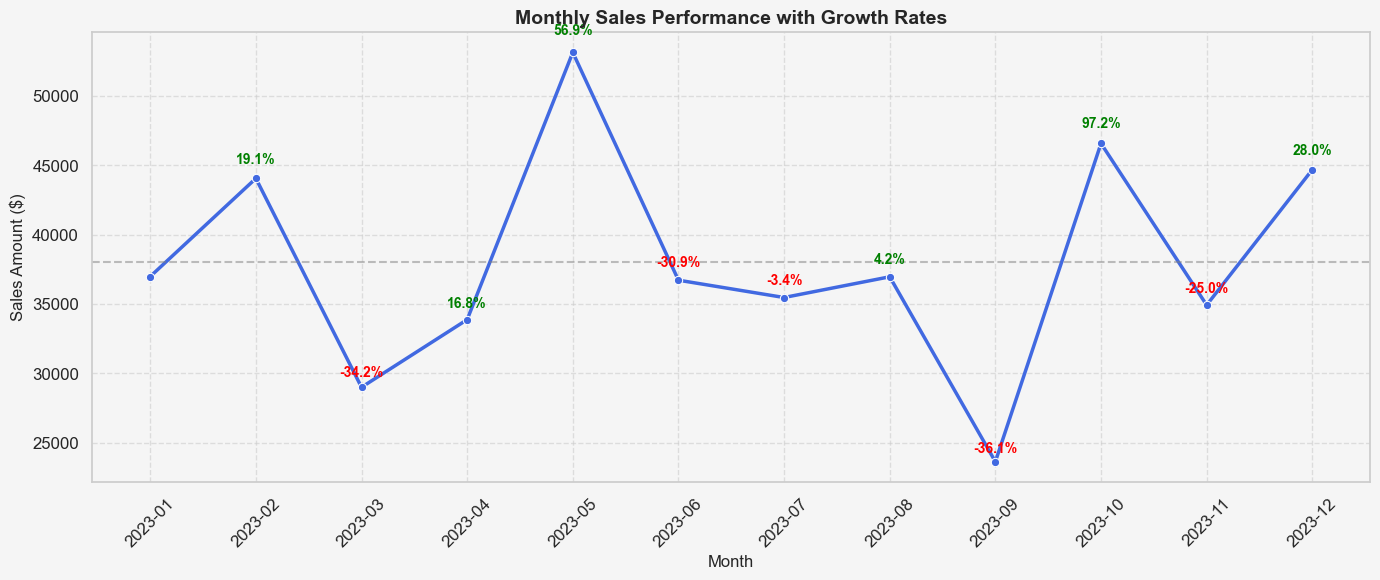

In [13]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(x='Month', y='MonthlySales', data=monthly_performance, 
                marker='o', color='royalblue', linewidth=2.5)
plt.title('Monthly Sales Performance with Growth Rates', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)

# Add growth rate annotations with conditional coloring
for i, row in monthly_performance.iterrows():
    if not pd.isna(row['GrowthRate']):
        color = 'green' if row['GrowthRate'] >= 0 else 'red'
        ax.text(i, row['MonthlySales']*1.02, f"{row['GrowthRate']:.1f}%", 
                ha='center', va='bottom', fontweight='bold',
                color=color, fontsize=10)

# Improve grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight positive/negative growth
ax.axhline(y=monthly_performance['MonthlySales'].mean(), 
        color='gray', linestyle='--', alpha=0.5)
plt.savefig('outputs/monthly_sales_growth_corrected.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Customer Analysis (Saved to Database)

In [14]:
# Create a customer summary table in the database
execute_sql("""
CREATE TABLE IF NOT EXISTS customer_summary AS
SELECT
    CustomerID,
    Gender,
    Age,
    COUNT(TransactionID) AS TransactionCount,
    SUM(TotalAmount) AS TotalSpent,
    MIN(Date) AS FirstPurchaseDate,
    MAX(Date) AS LastPurchaseDate,
    JULIANDAY(MAX(Date)) - JULIANDAY(MIN(Date)) AS CustomerTenureDays
FROM retail_sales
GROUP BY CustomerID, Gender, Age
""")

# Verify the table was created
print("Customer summary table created:")
display(run_query("SELECT * FROM customer_summary LIMIT 5"))

Customer summary table created:


,CustomerID,Gender,Age,TransactionCount,TotalSpent,FirstPurchaseDate,LastPurchaseDate,CustomerTenureDays
0,CUST001,Male,34,1,150,2023-11-24 00:00:00,2023-11-24 00:00:00,0.0
1,CUST002,Female,26,1,1000,2023-02-27 00:00:00,2023-02-27 00:00:00,0.0
2,CUST003,Male,50,1,30,2023-01-13 00:00:00,2023-01-13 00:00:00,0.0
3,CUST004,Male,37,1,500,2023-05-21 00:00:00,2023-05-21 00:00:00,0.0
4,CUST005,Male,30,1,100,2023-05-06 00:00:00,2023-05-06 00:00:00,0.0


In [15]:
# Verify
print("Customer summary table schema:")
display(run_query("PRAGMA table_info(customer_summary);"))

print("\nFirst 5 records:")
display(run_query("SELECT * FROM customer_summary LIMIT 5;"))

Customer summary table schema:


,cid,name,type,notnull,dflt_value,pk
0,0,CustomerID,TEXT,0,None,0
1,1,Gender,TEXT,0,None,0
2,2,Age,INT,0,None,0
3,3,TransactionCount,,0,None,0
4,4,TotalSpent,,0,None,0
5,5,FirstPurchaseDate,,0,None,0
6,6,LastPurchaseDate,,0,None,0
7,7,CustomerTenureDays,,0,None,0



First 5 records:


,CustomerID,Gender,Age,TransactionCount,TotalSpent,FirstPurchaseDate,LastPurchaseDate,CustomerTenureDays
0,CUST001,Male,34,1,150,2023-11-24 00:00:00,2023-11-24 00:00:00,0.0
1,CUST002,Female,26,1,1000,2023-02-27 00:00:00,2023-02-27 00:00:00,0.0
2,CUST003,Male,50,1,30,2023-01-13 00:00:00,2023-01-13 00:00:00,0.0
3,CUST004,Male,37,1,500,2023-05-21 00:00:00,2023-05-21 00:00:00,0.0
4,CUST005,Male,30,1,100,2023-05-06 00:00:00,2023-05-06 00:00:00,0.0


In [16]:
# Customer Segmentation Analysis
segmentation = run_query("""
SELECT
    CASE
        WHEN TotalSpent > 2000 THEN 'VIP'
        WHEN TotalSpent > 1000 THEN 'Premium'
        WHEN TotalSpent > 500 THEN 'Standard'
        ELSE 'Basic'
    END AS CustomerTier,
    COUNT(*) AS CustomerCount,
    SUM(TotalSpent) AS TotalRevenue,
    AVG(TotalSpent) AS AvgSpend,
    AVG(TransactionCount) AS AvgTransactions
FROM customer_summary
GROUP BY CustomerTier
ORDER BY TotalRevenue DESC
""")
print("Customer Segmentation by Spending Tier:")
display(segmentation)

Customer Segmentation by Spending Tier:


,CustomerTier,CustomerCount,TotalRevenue,AvgSpend,AvgTransactions
0,Premium,153,237800,1554.248366,1.0
1,Standard,146,125800,861.643836,1.0
2,Basic,701,92400,131.811698,1.0


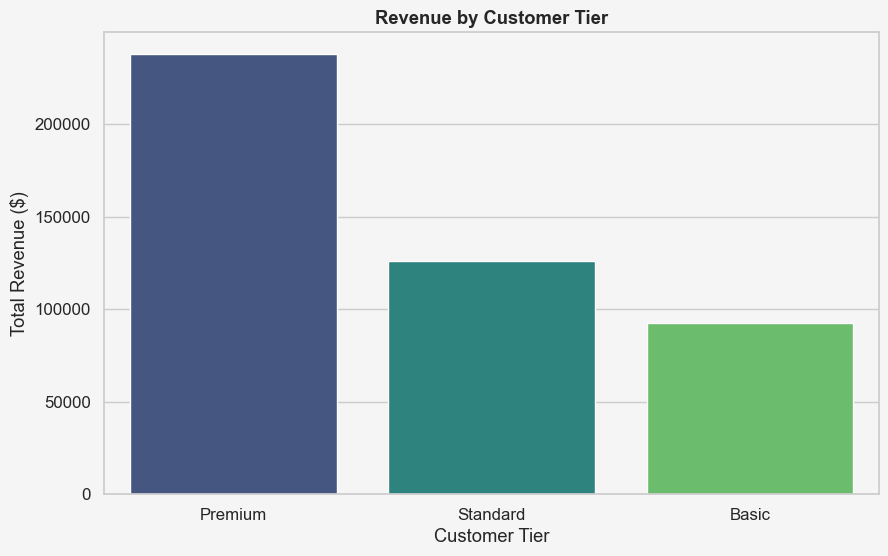

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerTier', y='TotalRevenue', data=segmentation, palette='viridis')
plt.title('Revenue by Customer Tier', fontweight='bold')
plt.xlabel('Customer Tier')
plt.ylabel('Total Revenue ($)')
plt.savefig('outputs/customer_tiers.png', dpi=300)
plt.show()

### 4.3 Product Analysis (Saved to Database)

In [18]:
# 1. First ensure retail_sales table exists
if not run_query("SELECT name FROM sqlite_master WHERE type='table' AND name='retail_sales'").empty:
    # 2. Create product_performance table
    execute_sql("""
    CREATE TABLE IF NOT EXISTS product_performance AS
    SELECT
        ProductCategory,
        COUNT(TransactionID) AS TransactionCount,
        SUM(Quantity) AS TotalUnitsSold,
        SUM(TotalAmount) AS TotalRevenue,
        AVG(PricexUnit) AS AvgPrice,
        SUM(TotalAmount) / SUM(Quantity) AS RevenuePerUnit
    FROM retail_sales
    GROUP BY ProductCategory
    """)
    
    # 3. Verify table creation
    if not run_query("SELECT name FROM sqlite_master WHERE type='table' AND name='product_performance'").empty:
        # 4. Now create index
        execute_sql("CREATE INDEX IF NOT EXISTS idx_product_category ON product_performance(ProductCategory)")
        
        # 5. Verify index creation
        print("Index created successfully:")
        display(run_query("SELECT * FROM sqlite_master WHERE type = 'index' AND tbl_name = 'product_performance';"))
    else:
        print("Error: product_performance table was not created")
else:
    print("Error: retail_sales table not found - load your data first")

Index created successfully:


,type,name,tbl_name,rootpage,sql
0,index,idx_product_category,product_performance,41,CREATE INDEX idx_product_category ON product_p...


In [19]:
print("Product performance table created:")
display(run_query("SELECT * FROM product_performance"))

Product performance table created:


,ProductCategory,TransactionCount,TotalUnitsSold,TotalRevenue,AvgPrice,RevenuePerUnit
0,Beauty,307,771,143515,184.055375,186
1,Clothing,351,894,155580,174.287749,174
2,Electronics,342,849,156905,181.900585,184


### 4.4 Save and Close Database

In [20]:
# Commit changes and close connection
conn.commit()
conn.close()
print(f"Database successfully saved to {db_path}")

Database successfully saved to data\retail_sales.db


In [21]:
# Verify the file was created
print("\nDatabase file info:")
print(f"Location: {os.path.abspath(db_path)}")
print(f"Size: {os.path.getsize(db_path)/1024:.2f} KB")


Database file info:
Location: c:\Users\Usuario\Desktop\100DaysofDataMastery\Day08_Project_RetailAnalytics\data\retail_sales.db
Size: 164.00 KB


---
# Testing retails_utils.py

---

In [ ]:
# from retail_utils import *

# # Configure environment
# configure_visuals()

# # Load and prepare data
# data_overview(data)
# cleaned_data = clean_data(data)

# # Create visualizations
# create_eda_dashboard(cleaned_data)
# create_interactive_plots(cleaned_data)

# # Perform SQL analysis
# with RetailDatabase() as db:
#     db.load_dataframe(cleaned_data, "retail_sales")
#     segments = analyze_customer_segments(db)
#     display(segments)